The primary aim of this research is to utilize Partial Dependence Plots and Feature Importance techniques for interpreting a range of models. Our approach involves starting with simpler models and gradually advancing to more complex ones, enabling a comprehensive assessment of the AI's decision-making process interpretability. Through experimentation across diverse real-world datasets, we aim to evaluate the strengths and limitations of these methods, shedding light on their effectiveness in various scenarios.
Our methodology starts with simulations, allowing us to evaluate these interpretability methods comprehensively. After analyzing the outcomes and gaining insights from these simulations, we plan to extend our approach to real-world datasets. This sequential process enables us to transfer the knowledge acquired from simulations and effectively apply it to practical scenarios, thereby enhancing our understanding of these interpretability methods across different datasets.

(2938, 22)

C:\Users\versu\AppData\Local\Temp\ipykernel_16760\1822337517.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = lindata.corr()


<Axes: >

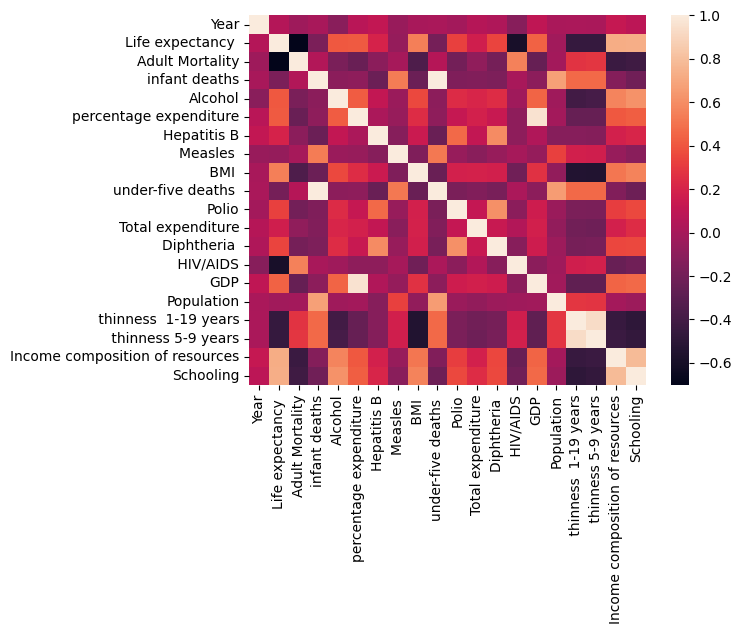

In [2]:
import pandas as pd
import seaborn as sns

Life_Expectancy_Data = pd.read_csv("./datasets/life_expectancy.csv")
display(Life_Expectancy_Data.shape)
data = Life_Expectancy_Data.copy()
data = data.dropna()            # If there is a missing or empty observation, delete it. Or 'data.fillna(data.mean(), inplace=True)' with this make NaN values take mean

lindata = data.copy()
multidata = data.copy()
polydata = data.copy()
RFdata = data.copy()
logdata = data.copy()
# plot the heatmap
corr = lindata.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [4]:
# logdata.drop(["Country","percentage expenditure","infant deaths"], axis=1, inplace=True)  
import numpy as np


logdata.drop(["Country"], axis=1, inplace=True)  
logdata.Status = [1 if each == "Developing" else 0 for each in logdata.Status]   
logdata.describe().T
y = logdata["Status"]
X_data = logdata.drop(["Status"], axis=1)
X = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data)).values

KeyError: "['Country'] not found in axis"

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lazypredict.Supervised import LazyClassifier
import xgboost
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =123)

clf = LazyClassifier(verbose=0,
                     ignore_warnings=False,
                     custom_metric=None,
                     predictions=True,
                     classifiers=[RandomForestClassifier, LogisticRegression, KNeighborsClassifier,MLPClassifier,xgboost.XGBClassifier,LinearSVC])
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:01<00:00,  3.12it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.99,0.98,0.98,0.99,0.08
RandomForestClassifier,0.98,0.98,0.98,0.98,0.33
MLPClassifier,0.95,0.93,0.93,0.95,1.33
KNeighborsClassifier,0.95,0.93,0.93,0.95,0.06
LinearSVC,0.93,0.87,0.87,0.93,0.07
LogisticRegression,0.93,0.87,0.87,0.93,0.05


In [7]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(penalty='none',solver='lbfgs',max_iter=1000)

# Fit the model
logreg.fit(X, y)

# Retrieve feature importance coefficients
coefficients = logreg.coef_[0]
# Create a DataFrame to display coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Display the table
display(coefficients_df)

,Feature,Coefficient
0,Year,2.20
1,Life expectancy,1.51
2,Adult Mortality,4.77
3,infant deaths,114.26
4,Alcohol,-5.96
5,percentage expenditure,1.23
6,Hepatitis B,-3.36
7,Measles,-4.67
8,BMI,-0.42
9,under-five deaths,407.25


In [6]:
HIV/AIDS	

NameError: name 'HIV' is not defined

In [ ]:
Conclusion
Along with linear depencies we have to further check for Non Linear depencies too. Although dependent variables do not create adverse effects while fitting the model but they can ruin our interpretations when we use technques like PDP/ICE.